In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
ageGroup = pd.read_csv(r'C:/ML/Covid19/AgeGroupDetails.csv')
covid19India = pd.read_csv(r'C:/ML/Covid19/covid_19_india.csv')
hospitalBeds = pd.read_csv(r'C:/ML/Covid19/HospitalBedsIndia.csv')
icmrTestDetails = pd.read_csv(r'C:/ML/Covid19/ICMRTestingDetails.csv')
icmrTestLabs = pd.read_csv(r'C:/ML/Covid19/ICMRTestingLabs.csv')
indiDetails = pd.read_csv(r'C:/ML/Covid19/IndividualDetails.csv')
indiaCencus = pd.read_csv(r'C:/ML/Covid19/population_india_census2011.csv')
stateDetails = pd.read_csv(r'C:/ML/Covid19/StatewiseTestingDetails.csv')

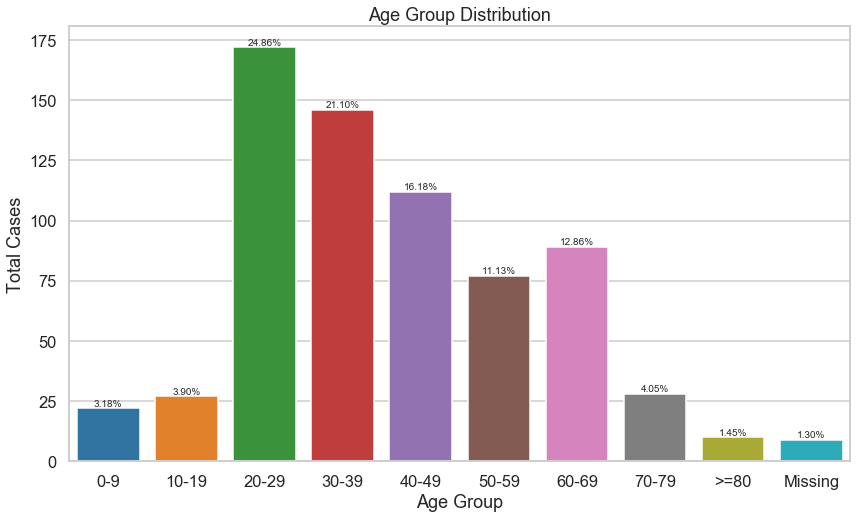

In [3]:
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')

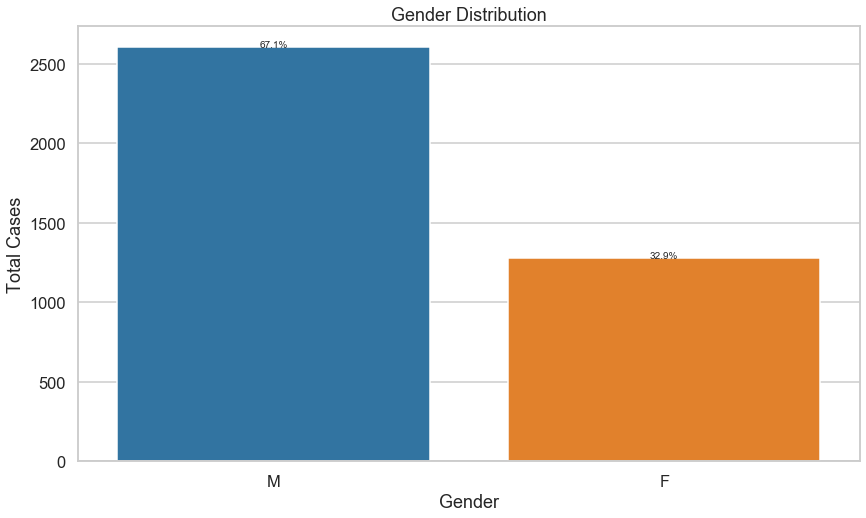

In [4]:
plt.figure(figsize=(14,8))
sns.countplot(data=indiDetails,x='gender',order=indiDetails['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Cases')
order2 = indiDetails['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / indiDetails.gender.dropna().count() )
    plt.text(i,count+2,strt,ha='center')

In [5]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
covid19India.at[1431,'Deaths']=119
covid19India.at[1431,'State/UnionTerritory']='Madhya Pradesh'
covid19India['Deaths']=covid19India['Deaths'].astype(int)
df1=covid19India.groupby('Date').sum()
df1.reset_index(inplace=True)

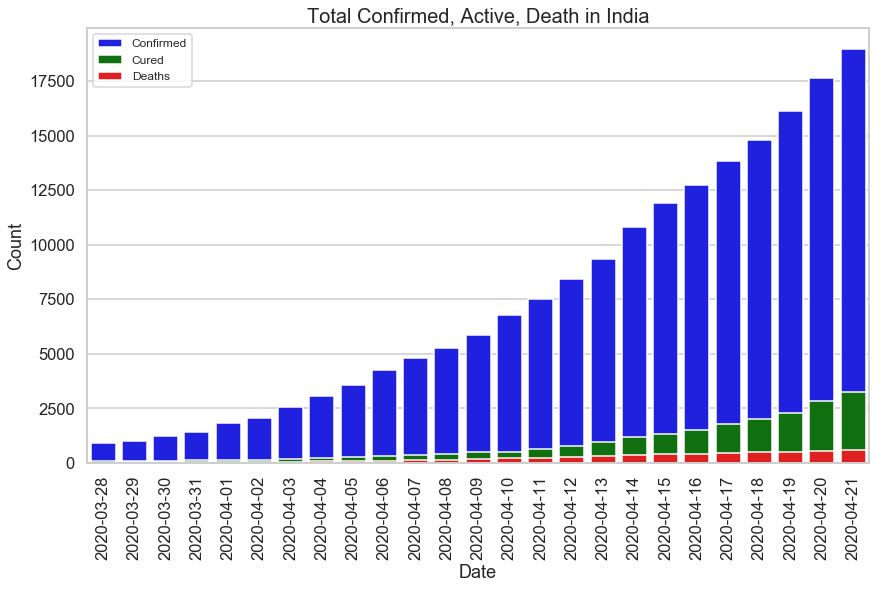

In [6]:
df2=df1.tail(25)
df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color='blue',label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color='green',label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color='red',label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12);

In [7]:
state_cases=covid19India.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
18,Maharashtra,4669,232,572,4329,4.97,12.25
7,Delhi,2081,47,431,1697,2.26,20.71
9,Gujarat,2066,77,131,2012,3.73,6.34
27,Rajasthan,1576,25,205,1396,1.59,13.01
17,Madhya Pradesh,1540,119,127,1532,7.73,8.25
28,Tamil Nadu,1520,17,457,1080,1.12,30.07
32,Uttar Pradesh,1294,20,140,1174,1.55,10.82
29,Telengana,919,23,190,752,2.5,20.67
1,Andhra Pradesh,757,22,96,683,2.91,12.68
14,Karnataka,415,17,114,318,4.1,27.47


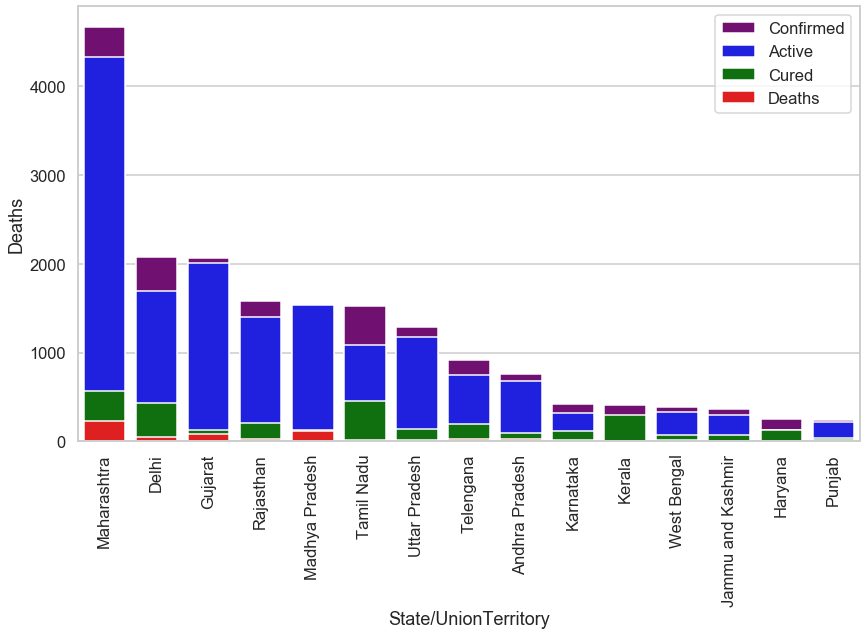

In [8]:
state_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0)
state_cases=state_cases.head(15)
state_cases
plt.figure(figsize=(14,8))
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Confirmed',color='purple',label='Confirmed')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Active',color='blue',label='Active')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Cured',color='green',label='Cured')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Deaths',color='red',label='Deaths')
plt.xticks(rotation=90)
plt.legend();

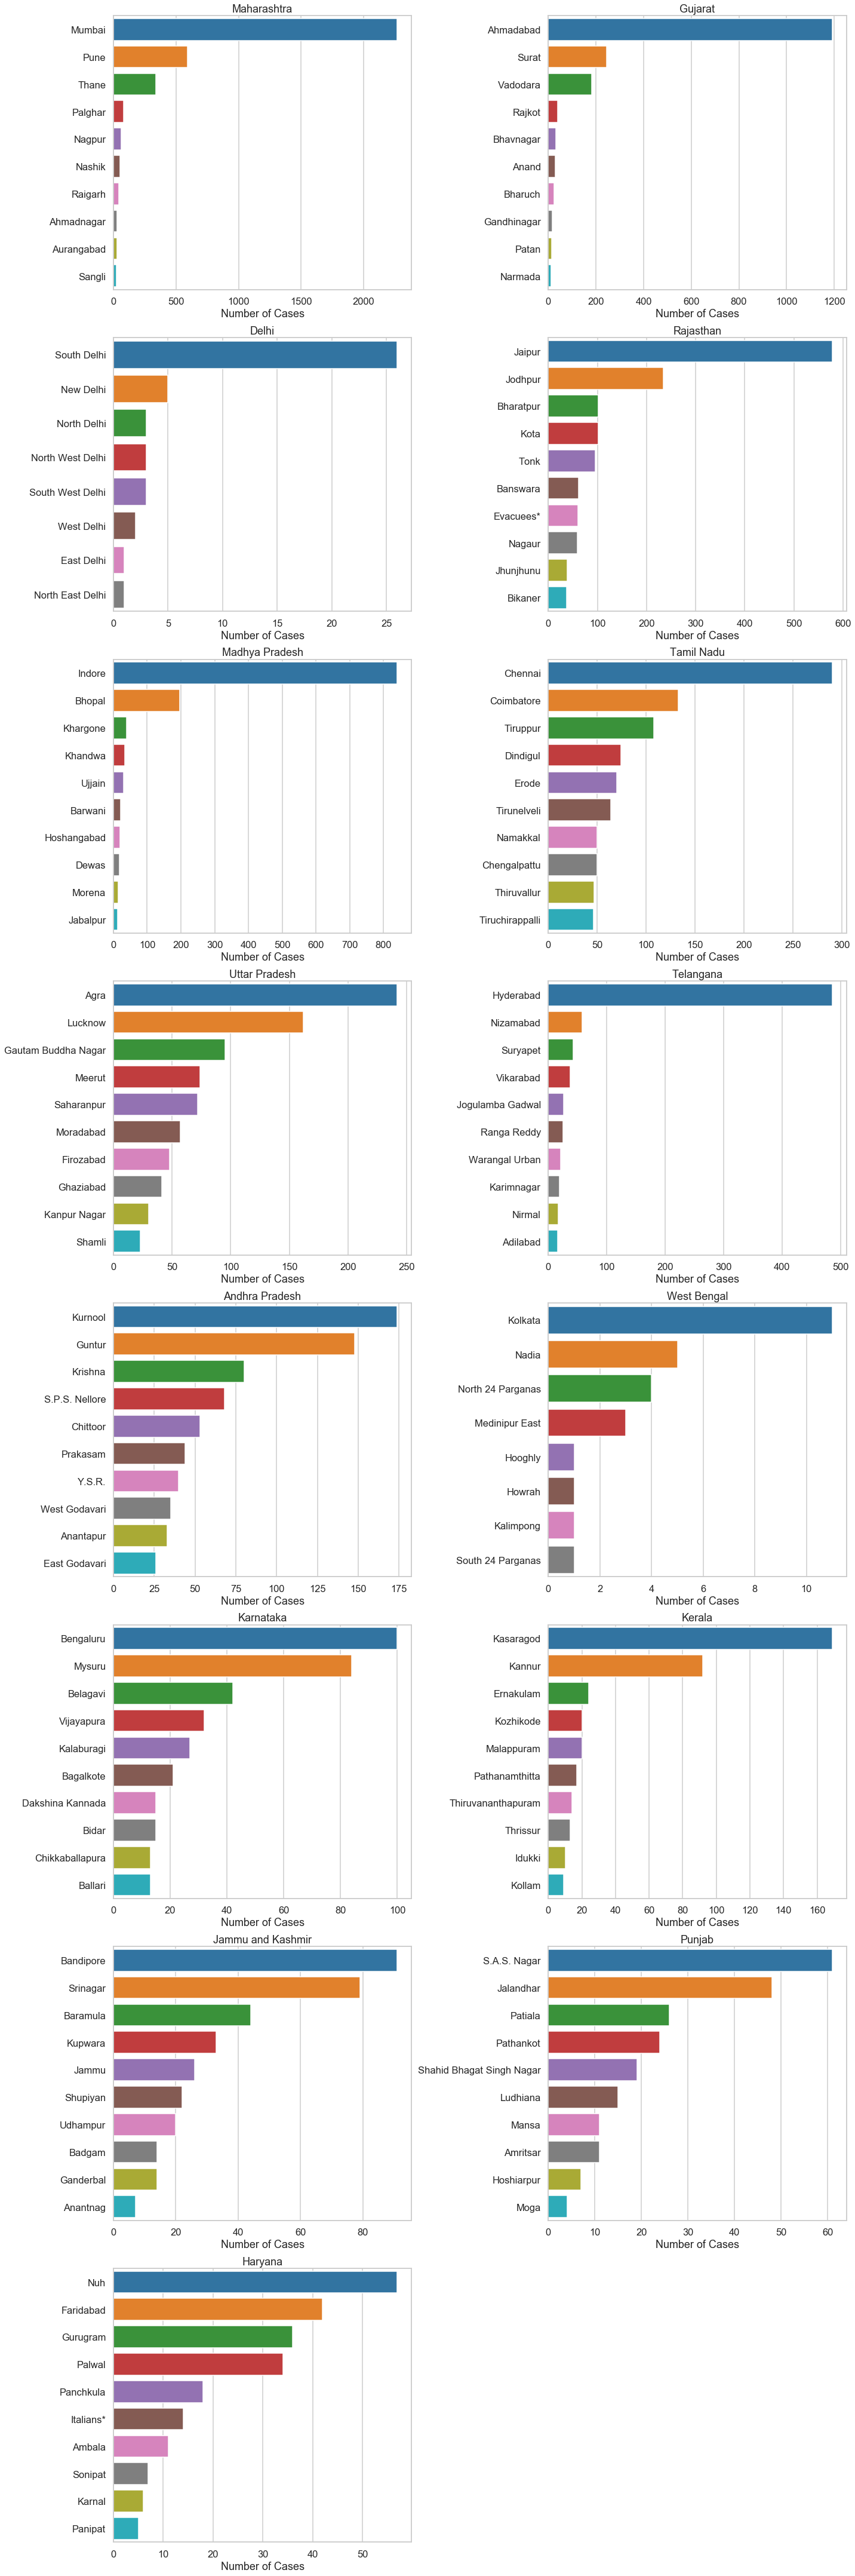

In [9]:
df3=indiDetails.groupby(['detected_state','detected_district']).count()
df3.reset_index(inplace=True)
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Telangana','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
plt.figure(figsize=(20,60))
for i,state in enumerate(states_list):
    plt.subplot(8,2,i+1)
    df4=df3[df3['detected_state']==state].sort_values('id',ascending=False)
    df4=df4.head(10)
    sns.barplot(data=df4,x='id',y='detected_district')
    plt.xlabel('Number of Cases')
    plt.ylabel('')
    plt.title(state)
plt.tight_layout()
plt.show()

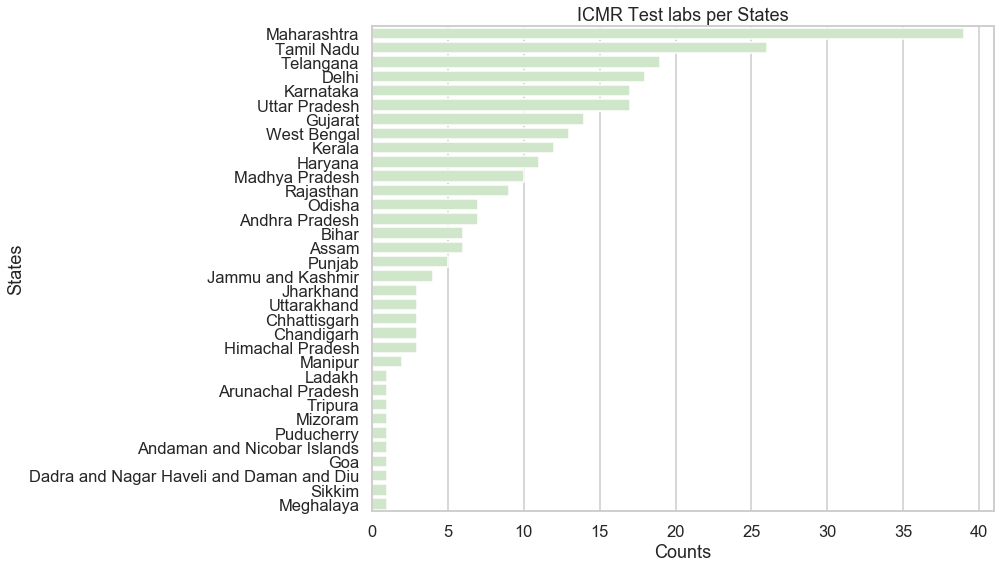

In [10]:
state=list(icmrTestLabs['state'].value_counts().index)
count=list(icmrTestLabs['state'].value_counts())
plt.figure(figsize=(14,8))
sns.barplot(x=count,y=state,color=sns.color_palette('Set3')[10])
plt.xlabel('Counts')
plt.ylabel('States')
plt.title('ICMR Test labs per States')
plt.tight_layout()

Text(0, 0.5, 'States')

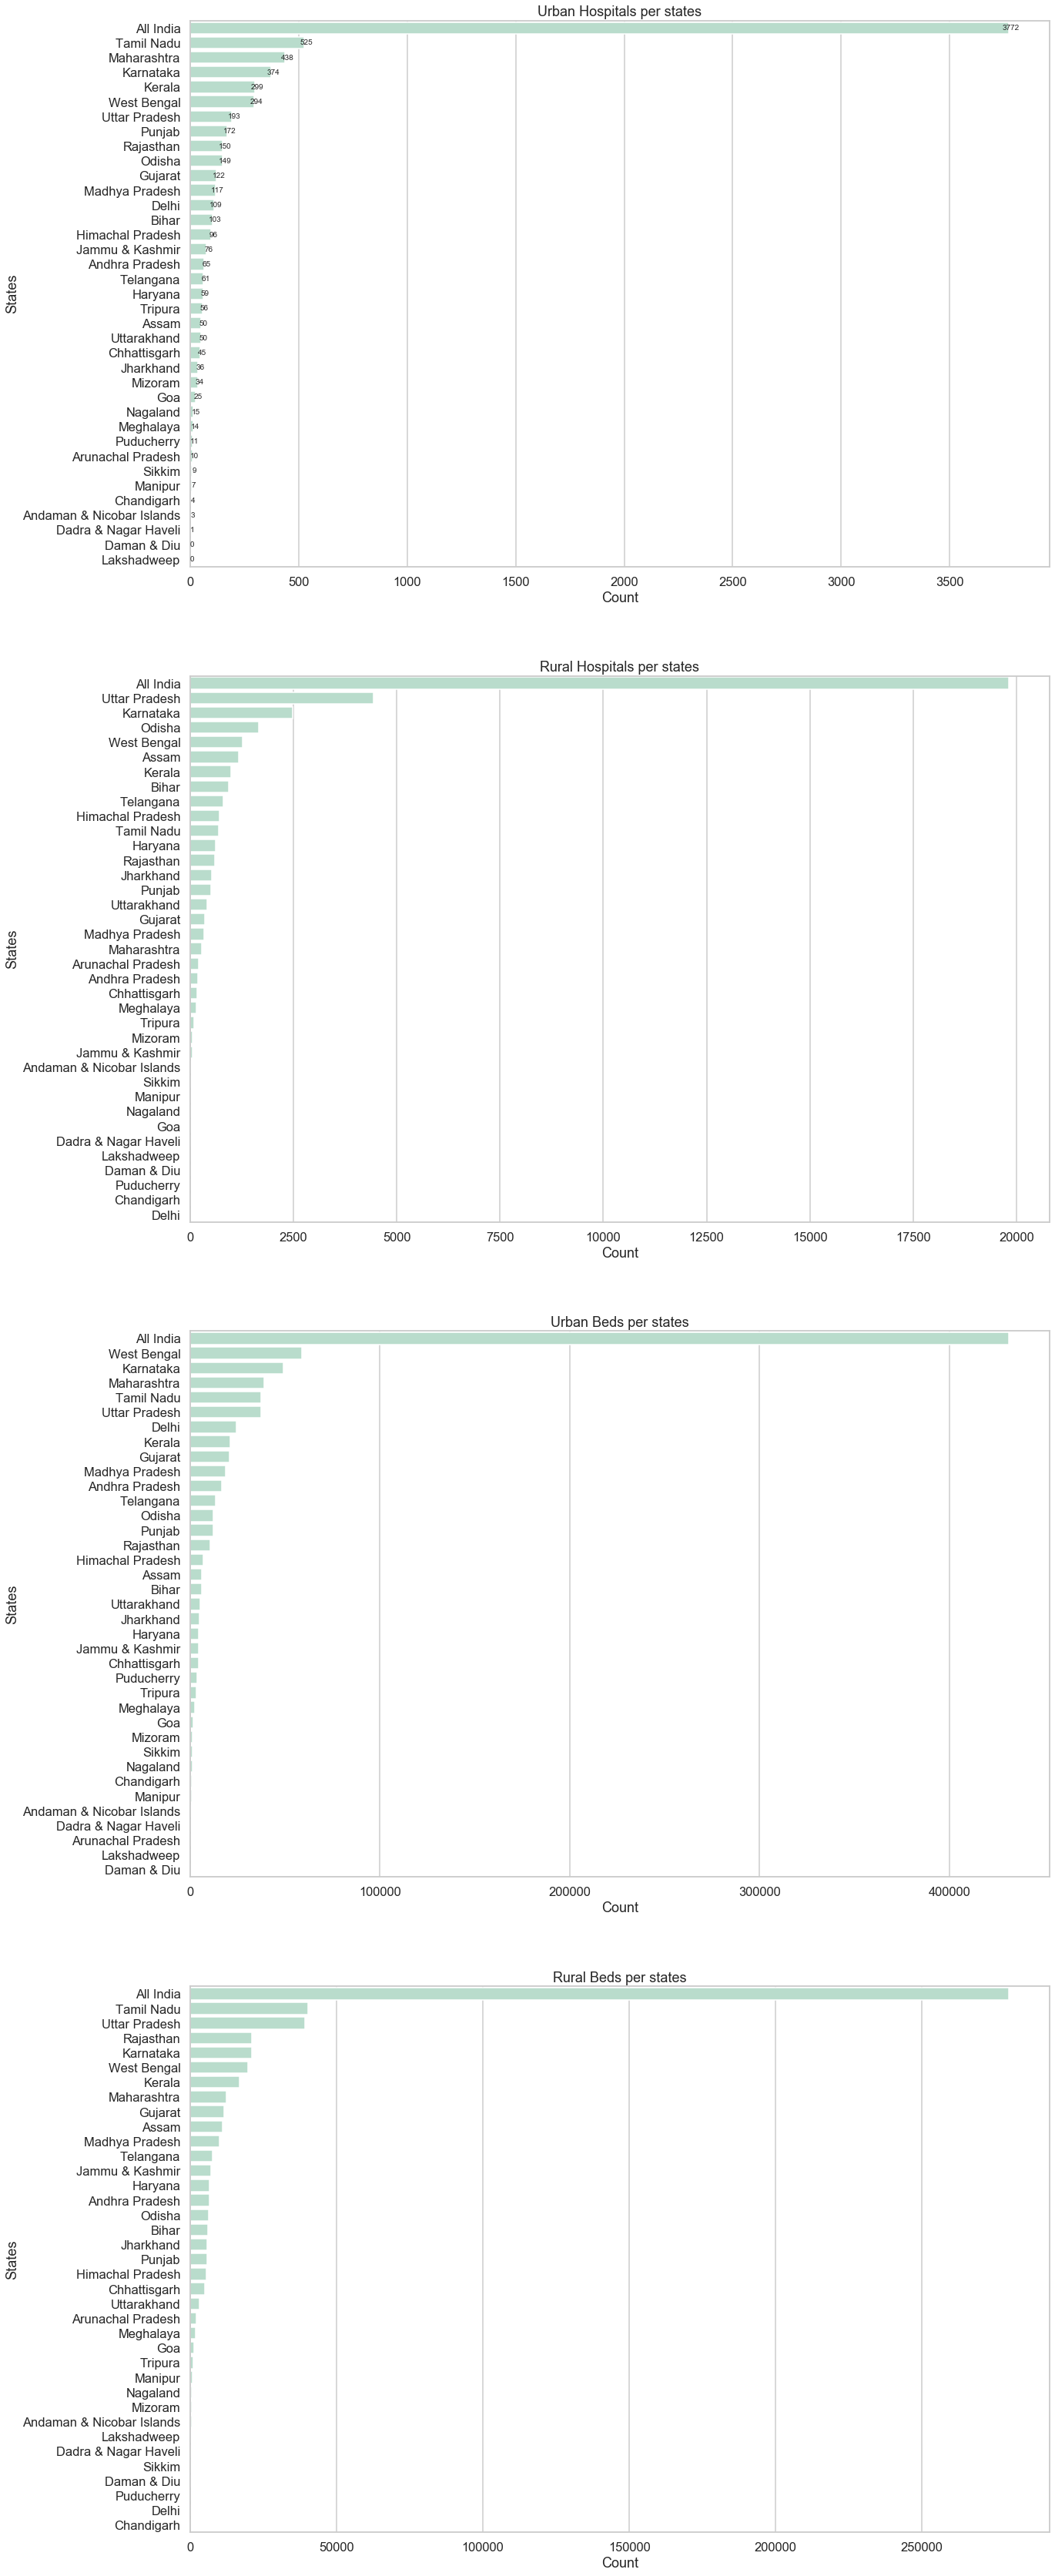

In [11]:
plt.figure(figsize=(20,60))
plt.subplot(4,1,1)
hospitalBeds=hospitalBeds.sort_values('NumUrbanHospitals_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumUrbanHospitals_NHP18',color=sns.color_palette('Pastel2')[0])
plt.title('Urban Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBeds.shape[0]):
    count = hospitalBeds.iloc[i]['NumUrbanHospitals_NHP18']
    plt.text(count+10,i,count,ha='center',va='center')
    
plt.subplot(4,1,2)
hospitalBeds=hospitalBeds.sort_values('NumRuralHospitals_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumRuralHospitals_NHP18',color=sns.color_palette('Pastel2')[0])
plt.title('Rural Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')

plt.subplot(4,1,3)
hospitalBeds=hospitalBeds.sort_values('NumUrbanBeds_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumUrbanBeds_NHP18',color=sns.color_palette('Pastel2')[0])
plt.title('Urban Beds per states')
plt.xlabel('Count')
plt.ylabel('States')

plt.subplot(4,1,4)
hospitalBeds=hospitalBeds.sort_values('NumRuralBeds_NHP18', ascending= False)
sns.barplot(data=hospitalBeds,y='State/UT',x='NumRuralBeds_NHP18',color=sns.color_palette('Pastel2')[0])
plt.title('Rural Beds per states')
plt.xlabel('Count')
plt.ylabel('States')